# Sesi 13 - Fundamental LSTM
This dataset is a playground for fundamental and technical analysis. It is said that 30% of traffic on stocks is already generated by machines, can trading be fully automated? If not, there is still a lot to learn from historical data.

Link Dataset
https://www.kaggle.com/datasets/dgawlik/nyse/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Import min-max scaling function
from sklearn.preprocessing import MinMaxScaler

# Import keras lstm model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_stock = pd.read_csv('/content/drive/MyDrive/Indonesia AI DataSet/prices-split-adjusted.csv')
df_stock

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [ ]:
# Unique symbols count
print('Unique symbols count:', df_stock['symbol'].nunique())

Unique symbols count: 501


In [ ]:
df_stock['symbol'].value_counts().head(10)

,count
symbol,
KSU,1762
NOC,1762
ORCL,1762
OMC,1762
OKE,1762
O,1762
NWL,1762
NVDA,1762
NUE,1762


In [ ]:
# Split only KSU stock
df_stock = df_stock[df_stock.symbol == 'KSU']

df_stock

,date,symbol,open,close,low,high,volume
500,2010-01-04,KSU,33.490002,33.650002,33.419998,33.869999,613500.0
968,2010-01-05,KSU,33.639999,34.310001,33.500000,34.439999,1129300.0
1436,2010-01-06,KSU,33.240002,32.049999,31.870001,33.590000,2627400.0
1904,2010-01-07,KSU,32.040001,32.410000,31.799999,32.799999,1076500.0
2372,2010-01-08,KSU,32.290001,33.860001,32.290001,34.020000,1005000.0
...,...,...,...,...,...,...,...
849029,2016-12-23,KSU,85.400002,85.290001,84.989998,85.930000,1376200.0
849529,2016-12-27,KSU,85.300003,86.160004,85.230003,86.379997,667000.0
850029,2016-12-28,KSU,85.870003,84.529999,84.419998,86.599998,805600.0
850529,2016-12-29,KSU,84.839996,84.459999,84.190002,85.089996,617600.0


In [ ]:
# Export to csv
df_stock.to_csv('KSU.csv', index=False)

# Prepare Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_stock = pd.read_csv('/content/drive/MyDrive/Indonesia AI DataSet/KSU.csv')
df_stock.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,symbol,open,close,low,high,volume
0,2010-01-04,KSU,33.490002,33.650002,33.419998,33.869999,613500.0
1,2010-01-05,KSU,33.639999,34.310001,33.500000,34.439999,1129300.0
2,2010-01-06,KSU,33.240002,32.049999,31.870001,33.590000,2627400.0
3,2010-01-07,KSU,32.040001,32.410000,31.799999,32.799999,1076500.0
4,2010-01-08,KSU,32.290001,33.860001,32.290001,34.020000,1005000.0


In [ ]:
# Ambil data KSU.csv
df_stock = pd.read_csv("KSU.csv")
plot_x = df_stock['date'].copy()
df_stock.set_index("date", inplace = True)
df_stock.index = pd.to_datetime(df_stock.index)
df_stock.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,KSU,33.490002,33.650002,33.419998,33.869999,613500.0
2010-01-05,KSU,33.639999,34.310001,33.500000,34.439999,1129300.0
2010-01-06,KSU,33.240002,32.049999,31.870001,33.590000,2627400.0
2010-01-07,KSU,32.040001,32.410000,31.799999,32.799999,1076500.0
2010-01-08,KSU,32.290001,33.860001,32.290001,34.020000,1005000.0


Text(0, 0.5, 'volume')

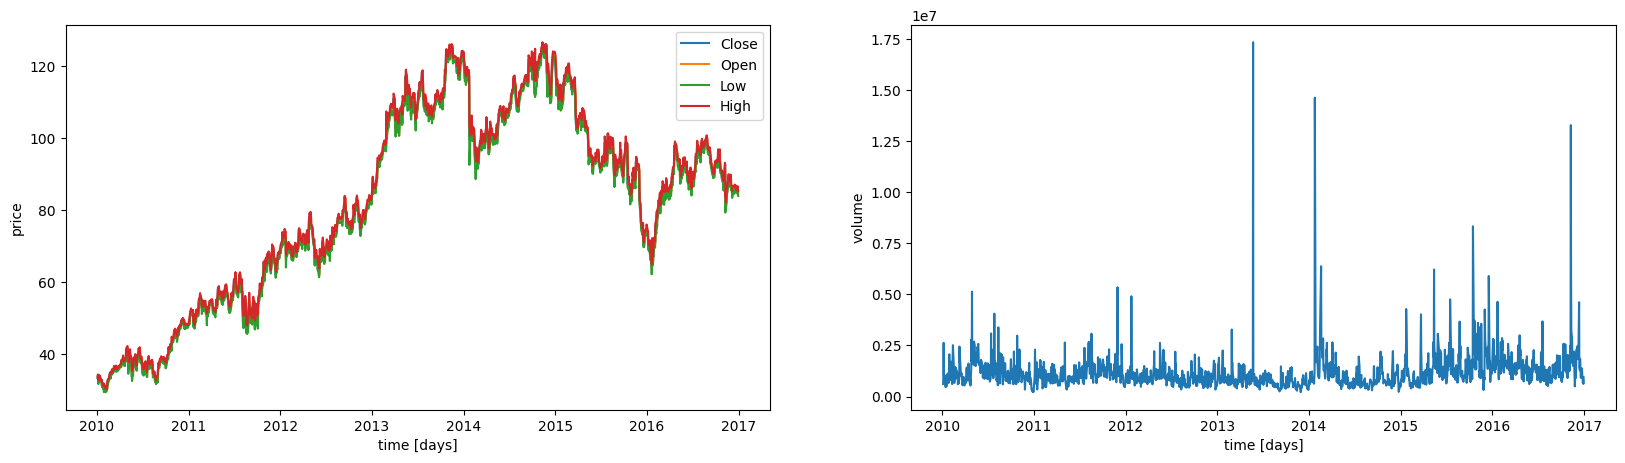

In [ ]:
# Plot data KSU
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(df_stock['close'])
ax[0].plot(df_stock['open'])
ax[0].plot(df_stock['low'])
ax[0].plot(df_stock['high'])
ax[0].legend(['Close', 'Open', 'Low', 'High'], loc='best')
ax[0].set_xlabel('time [days]')
ax[0].set_ylabel('price')

ax[1].plot(df_stock['volume'])
ax[1].set_xlabel('time [days]')
ax[1].set_ylabel('volume')


# Preprocessing Data

In [ ]:
# Split data
# Scalling

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
df_stock.drop(['symbol'], axis=1, inplace=True)
x = df_stock[['open', 'low', 'high', 'volume']].copy()
y = df_stock['close'].copy()

x[['open', 'low', 'high', 'volume']] = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y.values.reshape(-1, 1))

- MinMaxScaler digunakan untuk mengubah fitur dengan skala antara 0 dan 1.
- x: Input features diambil dari kolom open, low, high, dan volume.
- y: Target variable diambil dari kolom close.
- reshape(-1,1) : Nilai -1 berarti akan menghitung jumlah baris yang sesuai dengan mempertahankan jumlah elemen keseluruhan array. Dan angka 1 menandakan bahwa array akan memiliki 1 kolom.


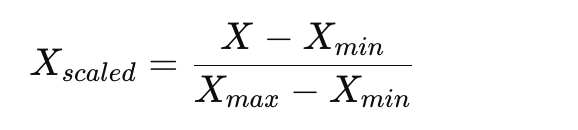

In [ ]:
x

,open,low,high,volume
date,,,,
2010-01-04,0.037811,0.040714,0.036313,0.023491
2010-01-05,0.039377,0.041549,0.042243,0.053602
2010-01-06,0.035200,0.024533,0.033399,0.141057
2010-01-07,0.022666,0.023802,0.025179,0.050520
2010-01-08,0.025277,0.028917,0.037873,0.046346
...,...,...,...,...
2016-12-23,0.580008,0.579079,0.577984,0.068015
2016-12-27,0.578964,0.581585,0.582666,0.026614
2016-12-28,0.584918,0.573129,0.584955,0.034705


In [ ]:
y

array([[0.04106884],
       [0.04793096],
       [0.02443333],
       ...,
       [0.57007694],
       [0.56934914],
       [0.57340403]])

In [ ]:
len(y)

1762

In [ ]:
def load_data(X, seq_len, train_size=0.9):
    amount_of_features = X.shape[1]
    X_mat = X.values
    sequence_length = seq_len + 1
    data = []

    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])

    data = np.array(data)
    train_split = int(round(train_size * data.shape[0]))
    train_data = data[:train_split, :]

    x_train = train_data[:, :-1]
    y_train = train_data[:, -1][:,-1]

    x_test = data[train_split:, :-1]
    y_test = data[train_split:, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return x_train, y_train, x_test, y_test

window = 22
x['close'] = y
X_train, y_train, X_test, y_test = load_data(x, window)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1565, 22, 5) (1565,) (174, 22, 5) (174,)


- X.shape[1]: Jumlah kolom dalam array (jumlah fitur atau variabel).
- sequence_length = seq_len + 1 : Panjang total jendela waktu, ditambah 1 untuk memasukkan variabel target di akhir setiap sekuens.
- window = 22 : Ada 22 hari kerja dalam sebulan (rata-rata), sehingga relevan untuk data keuangan seperti harga saham atau volume perdagangan.
Representasi periode tertentu, misalnya 22 hari terakhir dianggap cukup untuk menangkap pola musiman atau tren.

In [ ]:
X_train

array([[[0.03781075, 0.04071404, 0.03631256, 0.02349095, 0.04106884],
        [0.03937746, 0.04154922, 0.04224326, 0.05360187, 0.04793096],
        [0.03519951, 0.02453284, 0.03339924, 0.14105663, 0.02443333],
        ...,
        [0.        , 0.00365384, 0.00520237, 0.03552248, 0.01122895],
        [0.00960936, 0.0104395 , 0.0067631 , 0.03532983, 0.01133292],
        [0.00804259, 0.00918676, 0.01061285, 0.07652072, 0.01476398]],

       [[0.03937746, 0.04154922, 0.04224326, 0.05360187, 0.04793096],
        [0.03519951, 0.02453284, 0.03339924, 0.14105663, 0.02443333],
        [0.02266555, 0.02380206, 0.02517948, 0.05051956, 0.02817633],
        ...,
        [0.00960936, 0.0104395 , 0.0067631 , 0.03532983, 0.01133292],
        [0.00804259, 0.00918676, 0.01061285, 0.07652072, 0.01476398],
        [0.01044496, 0.00281868, 0.00509835, 0.06063631, 0.00166355]],

       [[0.03519951, 0.02453284, 0.03339924, 0.14105663, 0.02443333],
        [0.02266555, 0.02380206, 0.02517948, 0.05051956, 0.0

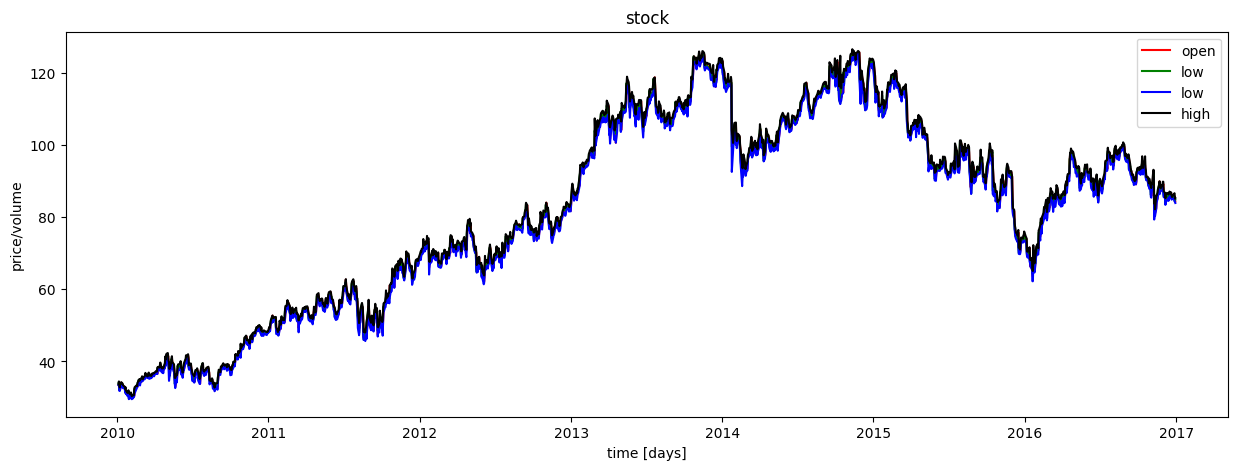

In [ ]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock['open'], color='red', label='open')
plt.plot(df_stock['close'], color='green', label='low')
plt.plot(df_stock['low'], color='blue', label='low')
plt.plot(df_stock['high'], color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('price/volume')
plt.legend(loc='best')
plt.show()

In [ ]:
#LSTM architecture
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, input_shape=(window,5),return_sequences=True))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Fourth LSTM layere
model.add(LSTM(units=50))
model.add(Dropout(0.5))
# The output layer
model.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
callbacks_list = [earlystop]

# Compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
start = time.time()
LSTM=model.fit(X_train,y_train,epochs=100,batch_size=35, validation_split=0.05, verbose=1,callbacks=callbacks_list)
print ('compilation time : ', time.time() - start)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - loss: 0.2272 - val_loss: 0.0067
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0106 - val_loss: 0.0056
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0080 - val_loss: 0.0038
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0073 - val_loss: 0.0055
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0065 - val_loss: 0.0062
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0071 - val_loss: 0.0060
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0064 - val_loss: 0.0040
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0055 - val_loss: 0.0059
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0056 - val_loss: 0.0033
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0048 - val_loss: 0.0031
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.

- Dropout(0.2): Menambahkan dropout dengan probabilitas 20% untuk menonaktifkan neuron secara acak selama pelatihan, yang dapat membantu mencegah overfitting.
- Dropout(0.5) dengan probabilitas 50% untuk dropout digunakan di sini, yang lebih tinggi karena lapisan keempat ini diharapkan untuk mempelajari informasi yang lebih kompleks dan mendalam dari data.
- EarlyStopping digunakan untuk menghentikan pelatihan jika loss pada data validasi (val_loss) tidak membaik setelah sejumlah epoch tertentu. Early stopping juga diterapkan untuk mencegah model berjalan terlalu lama jika performanya sudah mencapai titik optimal.
- monitor='val_loss': Memantau loss pada data validasi.
- mode='min': Menghentikan pelatihan jika loss terus menurun.
- patience=50: Menunggu 50 epoch tanpa perbaikan pada loss sebelum pelatihan dihentikan.
- optimizer='adam': Menggunakan Adam optimizer, yang merupakan algoritma optimisasi yang sangat populer untuk model deep learning karena kinerjanya yang baik pada berbagai jenis dataset.
- loss='mean_squared_error': Menggunakan mean squared error (MSE) sebagai fungsi loss untuk tugas regresi, yang cocok untuk memprediksi nilai kontinu seperti harga saham.

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 22, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 22, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 22, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 22, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 22, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,205 (871.90 KB)

 Trainable params: 74,401 (290.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 148,804 (581.27 KB)

<Axes: >

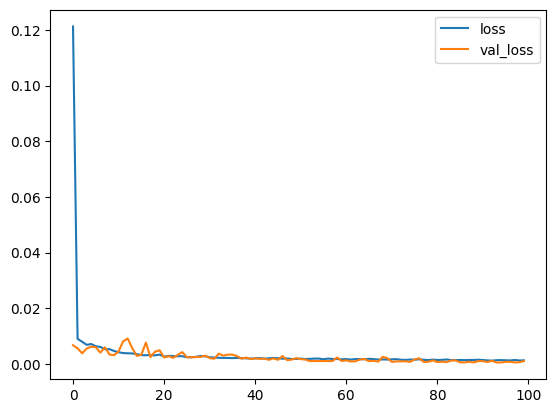

In [ ]:
%matplotlib inline
losses = pd.DataFrame(LSTM.history)
losses.plot()

In [ ]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform([y_train])
testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform([y_test])

49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
plot_predicted = testPredict.copy()
plot_predicted = plot_predicted.reshape(174, 1)
plot_actual = testY.copy()
plot_actual = plot_actual.reshape(174, 1)
print(plot_actual.shape)
print(plot_predicted.shape)

(174, 1)
(174, 1)


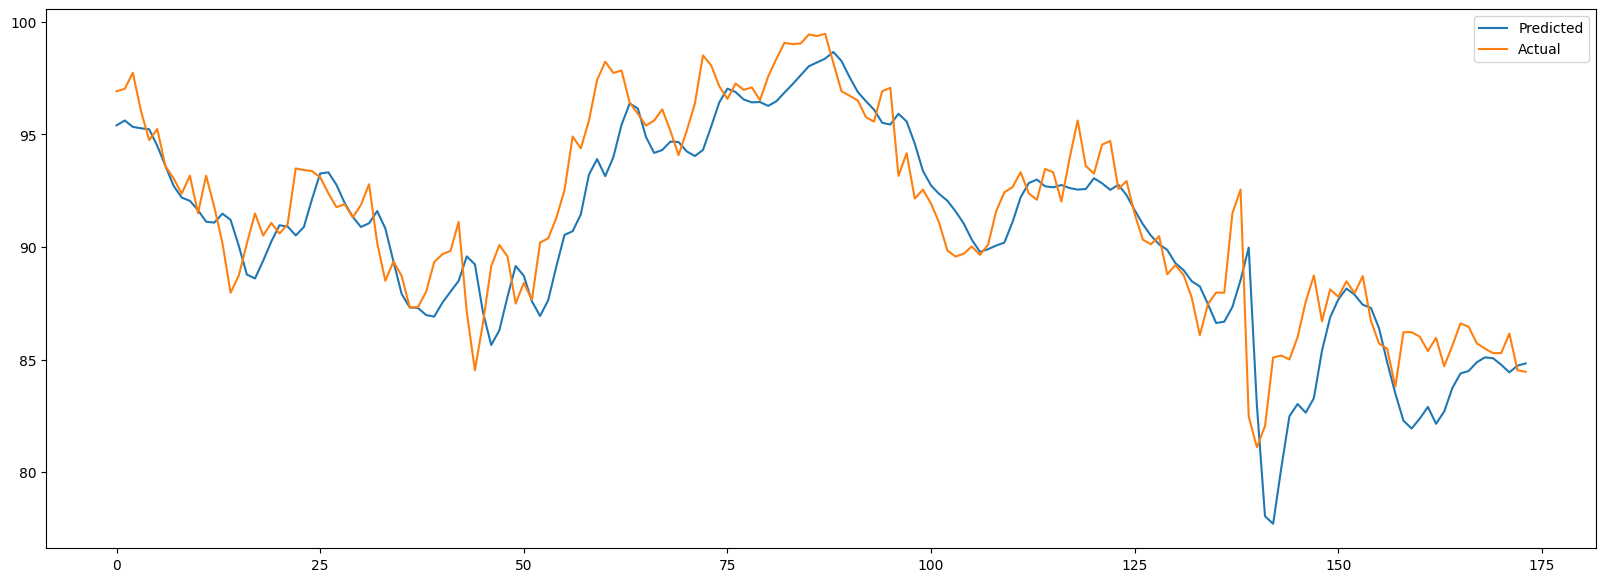

In [ ]:
plt.figure(figsize=(20,7))
plot_x = pd.to_datetime(plot_x.iloc[-174:])
plt.plot(pd.DataFrame(plot_predicted), label='Predicted')
plt.plot(pd.DataFrame(plot_actual), label='Actual')
plt.legend(loc='best')
plt.show()

In [ ]:
trainScore = mean_squared_error(trainY[0], trainPredict[:,0]) ** .5
print('Train Score: %.2f RMSE' % (trainScore))
testScore = mean_squared_error(testY[0], testPredict[:,0]) ** .5
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.50 RMSE
Test Score: 2.10 RMSE


In [ ]:
KSU_stock_prices = df_stock.close.values.astype('float32')
KSU_stock_prices = KSU_stock_prices.reshape(len(KSU_stock_prices), 1)

In [ ]:
trainPredictPlot = np.empty_like(KSU_stock_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[22:len(trainPredict)+22, :] = trainPredict

testPredictPlot = np.empty_like(KSU_stock_prices)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(KSU_stock_prices) - testPredict.shape[0]):len(KSU_stock_prices), :] = testPredict

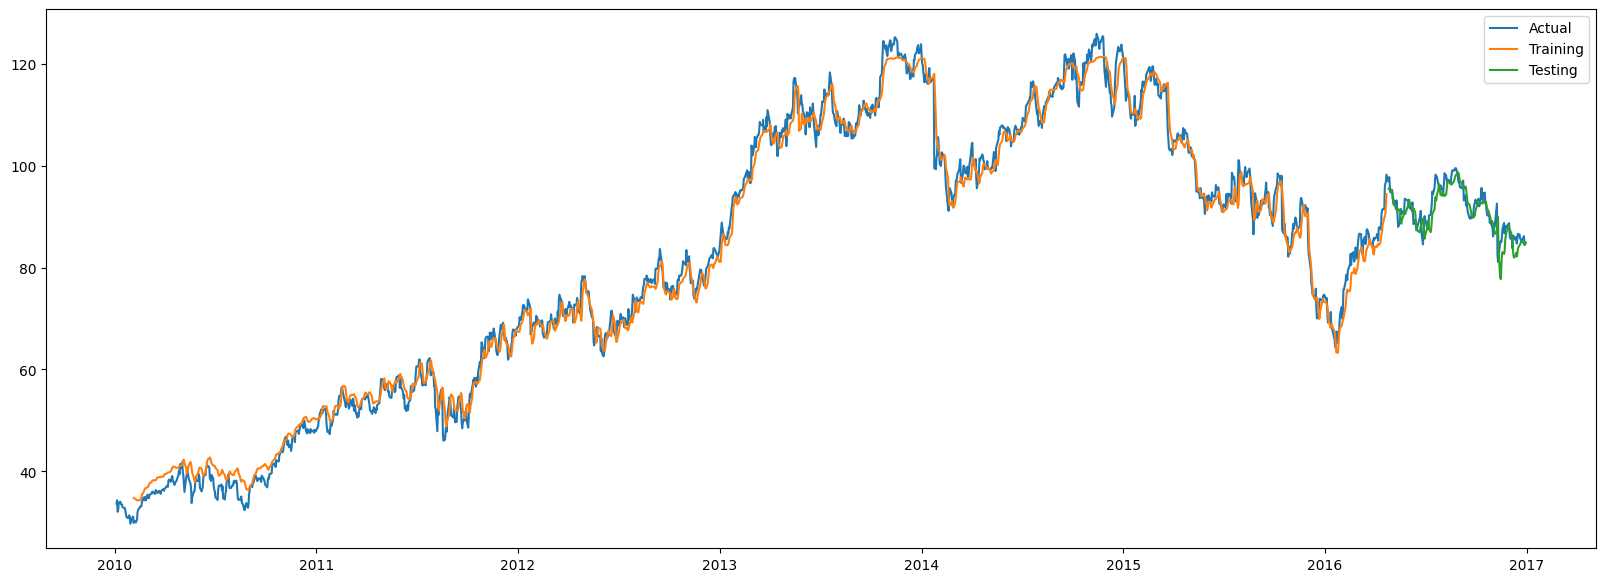

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(pd.DataFrame(KSU_stock_prices, columns=["close"], index=df_stock.index).close, label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df_stock.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df_stock.index).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [ ]:
model.save('./Final_model.h5')